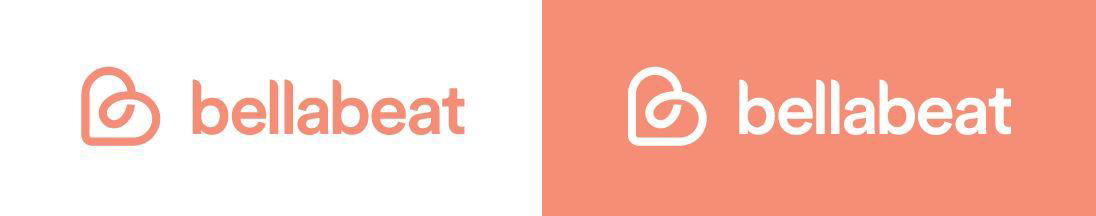

# **Data Analysis For BellaBeat: Product Marketing Strategy**

Author: Rachel Collins

Date Last Updated: 25-07-2021

**About the company:**  
   BellaBeat is a high-tech company that manufactures health-focused smart products for women, which was founded in 2013 by Urška Sršen and Sando Mur.  The products offered by BellaBeat, provide women with the knowledge reagrding their health and habits.  

**Objective of Analysis:** 
   Analyze smart device usage data to gain insight into how clients are using the products.  We will then use these insights to guide marketing strategy, to help with new growth opportunites.

**Source of the data used:** 
   The dataset used in this analysis is from [FitBit Fitness Tracker Data](http://www.kaggle.com/arashnic/fitbit) which was made available by [Möbius](https://www.kaggle.com/arashnic). There are 18 datasets provided, I chose to focus on the 3 which are Daily Activity, Sleep Log and Weight Log.

**Data Preperation, Processing and Analysis**

Load the necessary libraries for cleaning, analysis and visualization

In [1]:
library(tidyverse)
library(lubridate)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




Import the CSV files needed

In [2]:
daily_activity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleep_log <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight_log <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  ActivityDate = col_character(),
  TotalSteps = col_double(),
  TotalDistance = col_double(),
  TrackerDistance = col_double(),
  LoggedActivitiesDistance = col_double(),
  VeryActiveDistance = col_double(),
  ModeratelyActiveDistance = col_double(),
  LightActiveDistance = col_double(),
  SedentaryActiveDistance = col_double(),
  VeryActiveMinutes = col_double(),
  FairlyActiveMinutes = col_double(),
  LightlyActiveMinutes = col_double(),
  SedentaryMinutes = col_double(),
  Calories = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  SleepDay = col_character(),
  TotalSleepRecords = col_double(),
  TotalMinutesAsleep = col_double(),
  TotalTimeInBed = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  Date = col_character()

First I'll use the glimpse() function to take a look at the dimensions, structure and column names for each file, and then use the head() function to preview the data

In [3]:
glimpse(daily_activity)
head(daily_activity)

Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [4]:
glimpse(sleep_log)
head(sleep_log)


Rows: 413
Columns: 5
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ SleepDay           <chr> "4/12/2016 12:00:00 AM", "4/13/2016 12:00:00 AM", "…
$ TotalSleepRecords  <dbl> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep <dbl> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <dbl> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


In [5]:
glimpse(weight_log)
head(weight_log)

Rows: 67
Columns: 8
$ Id             <dbl> 1503960366, 1503960366, 1927972279, 2873212765, 2873212…
$ Date           <chr> "5/2/2016 11:59:59 PM", "5/3/2016 11:59:59 PM", "4/13/2…
$ WeightKg       <dbl> 52.6, 52.6, 133.5, 56.7, 57.3, 72.4, 72.3, 69.7, 70.3, …
$ WeightPounds   <dbl> 115.9631, 115.9631, 294.3171, 125.0021, 126.3249, 159.6…
$ Fat            <dbl> 22, NA, NA, NA, NA, 25, NA, NA, NA, NA, NA, NA, NA, NA,…
$ BMI            <dbl> 22.65, 22.65, 47.54, 21.45, 21.69, 27.45, 27.38, 27.25,…
$ IsManualReport <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, …
$ LogId          <dbl> 1.462234e+12, 1.462320e+12, 1.460510e+12, 1.461283e+12,…


Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


* We can see that the Date columns have the data type of Character, we will have to convert that during cleaning, so that the Date's are formatted correctly as Date type.
* We can also see that the Sleep Log and Weight Log data sets have the Date and Time combined in 1 column.  As we will only focus on using the Date information, we will also need to seperate these 2 pieces during the cleaning process.


It looks like there aren't as many records in the Sleep and Weight logs provided.  To check how many participants record information in these 2 files, we'll check how many unique Ids are logged in all 3 files.

In [6]:
length(unique(daily_activity$Id))
length(unique(sleep_log$Id))
length(unique(weight_log$Id))

[1] 33

[1] 24

[1] 8

We can now tell that only 24 out of 33 participants logged sleep data for the 30 days surveyed, and only 8 logged weight data.

This tells us that most of these users are logging their daily activities, but not many of them use the products to track their weight, and a moderate amount of users track their sleep habits.

**Cleaning and formatting the data**

For the daily_activity data set, I need to change the data type of the ActivityDate column.  I also want to rename this column, so further along in the process I can easily merge this file with the other 2.

In [7]:
daily_activity$ActivityDate <- mdy(daily_activity$ActivityDate)

In [8]:
daily_log <- daily_activity %>% 
  dplyr::rename(Date = ActivityDate)

let's make sure the changes took place before moving on

In [9]:
str(daily_log$Date)
head(daily_log)

 Date[1:940], format: "2016-04-12" "2016-04-13" "2016-04-14" "2016-04-15" "2016-04-16" ...


Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Next we want to focus on the sleep_log, and seperate date and time into 2 columns.  I also need to rename these new columns, and convert the date column data type.

In [10]:
daily_sleep <- sleep_log %>% 
  separate(col = SleepDay, into = c("Date", "SleepTime"), sep = " ") %>%
  mutate(Date = mdy(Date))

Warning message:
“Expected 2 pieces. Additional pieces discarded in 413 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


I also want to add a new column called SleepQuality, this will allow me to dive further into detail regarding the type of sleep the participants had for th 30 days recorded.

In [11]:
daily_sleep %>% 
  mutate(SleepQuality = case_when(
    daily_sleep$TotalMinutesAsleep >= 360 & 
      daily_sleep$TotalMinutesAsleep <= 480 ~ "Adequate Sleep",
    daily_sleep$TotalMinutesAsleep < 360 ~ "Sleep Deprived",
    daily_sleep$TotalMinutesAsleep > 480 ~ "Excessive Sleep")) -> daily_sleep

Now let's run the head()and str() functions,  to make sure our changes took place

In [12]:
str(daily_sleep$Date)
head(daily_sleep)

 Date[1:413], format: "2016-04-12" "2016-04-13" "2016-04-15" "2016-04-16" "2016-04-17" ...


Id,Date,SleepTime,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,SleepQuality
<dbl>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,2016-04-12,12:00:00,1,327,346,Sleep Deprived
1503960366,2016-04-13,12:00:00,2,384,407,Adequate Sleep
1503960366,2016-04-15,12:00:00,1,412,442,Adequate Sleep
1503960366,2016-04-16,12:00:00,2,340,367,Sleep Deprived
1503960366,2016-04-17,12:00:00,1,700,712,Excessive Sleep
1503960366,2016-04-19,12:00:00,1,304,320,Sleep Deprived


I also need to seperate the date and time data into 2 new columns for the weight_log data, as well as renaming the columns and converting the date column data type.

In [13]:
weight_df <- weight_log %>% 
  separate(col = Date, into = c("Date", "WeightTime"), sep = " ") %>%
  mutate(Date = mdy(Date))

Warning message:
“Expected 2 pieces. Additional pieces discarded in 67 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


For data privacy, I've decided to remove the LogId in the weight data set.

In [14]:
weight_df$LogId <- NULL

let's run the head() and str() functions to make sure our changes to the data set took place.

In [15]:
str(weight_df$Date)
head(weight_df)

 Date[1:67], format: "2016-05-02" "2016-05-03" "2016-04-13" "2016-04-21" "2016-05-12" ...


Id,Date,WeightTime,WeightKg,WeightPounds,Fat,BMI,IsManualReport
<dbl>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1503960366,2016-05-02,11:59:59,52.6,115.9631,22,22.65,TRUE
1503960366,2016-05-03,11:59:59,52.6,115.9631,NA,22.65,TRUE
1927972279,2016-04-13,1:08:52,133.5,294.3171,NA,47.54,FALSE
2873212765,2016-04-21,11:59:59,56.7,125.0021,NA,21.45,TRUE
2873212765,2016-05-12,11:59:59,57.3,126.3249,NA,21.69,TRUE
4319703577,2016-04-17,11:59:59,72.4,159.6147,25,27.45,TRUE


**Preliminary Exploration before Merging Data Sets**

Before merging the 3 data sets, I want to take a look at some data for the Sleep data

I first want to plot the Total Time Asleep and Total Time in Bed columns, to compare these 2, I will also include the SleepQuality column as color for the data points.

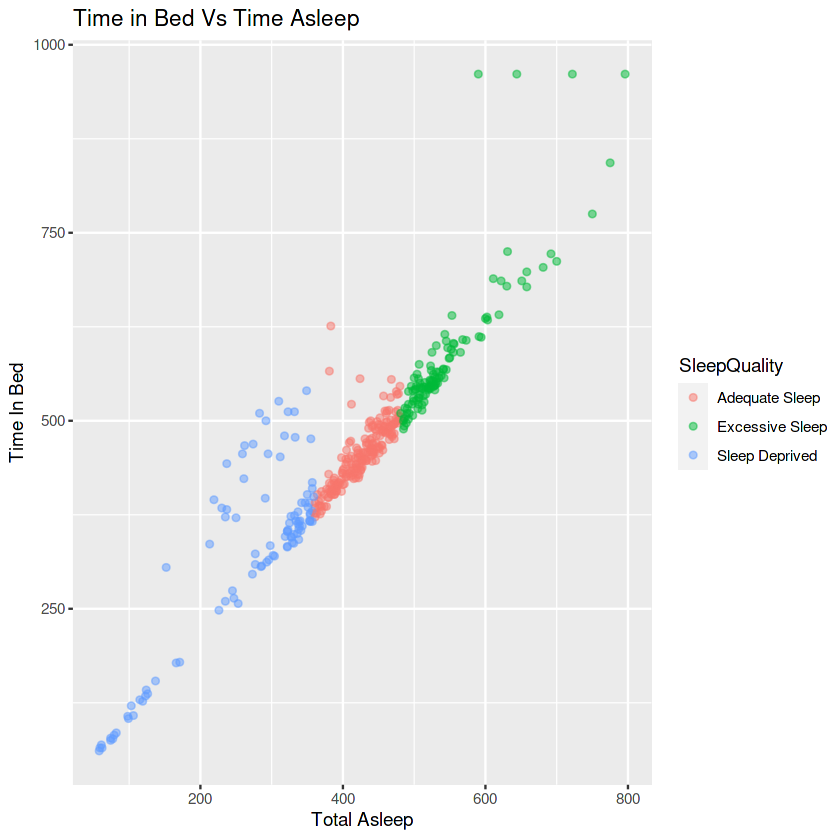

In [16]:
ggplot(daily_sleep) +
  geom_point(aes(x = TotalMinutesAsleep, y = TotalTimeInBed, 
                 color = SleepQuality), alpha = 0.5) +
  labs(title = "Time in Bed Vs Time Asleep", x = "Total Asleep", y = "Time In Bed")

From the plot we can see that as time in bed increases, the total time asleep also increases.  It appears that the more time spent in bed, we have a higher concentration of excessive sleeping.

Let's take a closer look at the Time Asleep and the Sleep Quality of the participants.  So I do not make any changes to the file that will be merged with the other 2, I first create a new dataframe with the columns that I want.  Also to make my plot easy to understand, I want to change the Dates to the names of the days of the week.

In [17]:
sleep_qual_df <- daily_sleep %>% 
  select(Date, TotalMinutesAsleep, TotalTimeInBed, SleepQuality) %>% 
  group_by(Date)
  

In [18]:
sleep_qual_df$Date <- weekdays(sleep_qual_df$Date)

In [19]:
sleep_qual_df$Date <- factor(sleep_qual_df$Date, 
                                 levels = c("Monday", "Tuesday", "Wednesday", 
                                            "Thursday", "Friday", "Saturday", 
                                            "Sunday"))

Now let's create a plot to analyze the Total Minutes Asleep per day, with the Quality of Sleep incorporated.

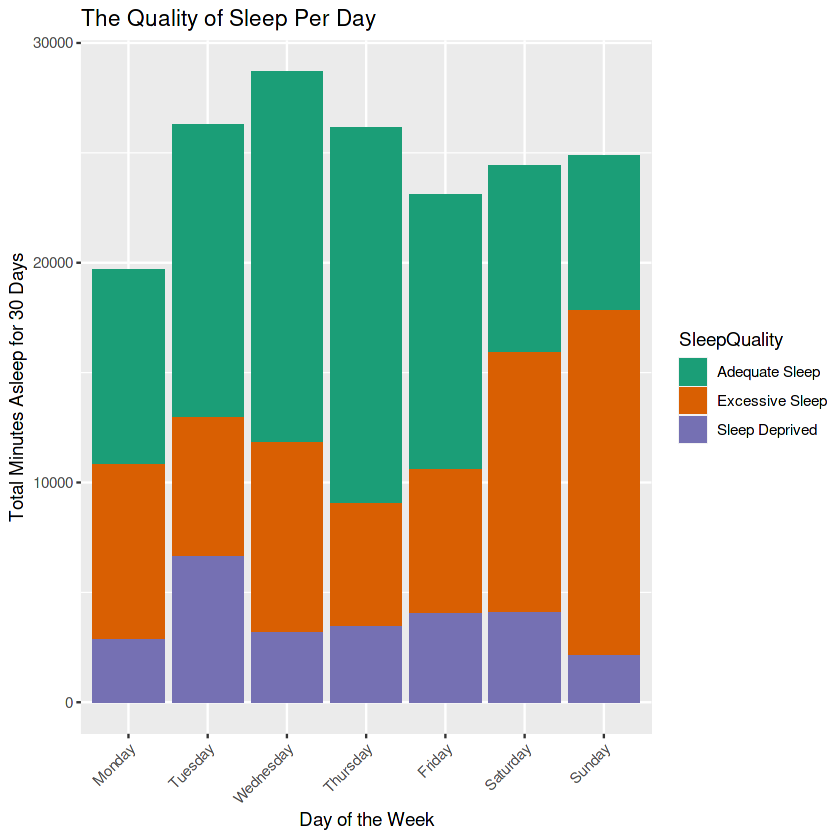

In [20]:
ggplot(sleep_qual_df) + 
  geom_col(mapping = aes(x = Date, y = TotalMinutesAsleep, fill = SleepQuality)) +
  scale_fill_brewer(palette = "Dark2") +
  labs(title = "The Quality of Sleep Per Day", x = "Day of the Week", 
       y = "Total Minutes Asleep for 30 Days") +
  theme(axis.text.x=element_text(angle=45,hjust=1))

Our stacked bar chart shows that the participants who recorded sleep data, have the most adequate sleep Wednesdays and Thursdays, the least amount of sleep on Tuesdays and excessive sleep on Sundays.

For further analysis, I want to merge the 3 data sets in order to make comparisons with different variables.

I first join the daily_activity and daily_sleep dataframes

In [21]:
activity_log <- left_join(daily_log, daily_sleep, by = c("Id", "Date"))

Next I'll join the new dataframe with the weight_df

In [22]:
full_activity_log <- left_join(activity_log, weight_df, by = c("Id", "Date"))

To make our Date Column for further analysis and comparisons easier, I'm convert the date to day of the week.

In [23]:
full_activity_log$Date <- weekdays(full_activity_log$Date)

Now that the 3 data sets are merged, let's take a look using glimpse() and head() functions to make sure everything is set up properly, as well as checking how many unique Ids there are in the new dataframe, to confirm we have 33.

In [24]:
glimpse(full_activity_log)
length(unique(full_activity_log$Id))
head(full_activity_log)

Rows: 943
Columns: 26
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ Date                     <chr> "Tuesday", "Wednesday", "Thursday", "Friday",…
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

[1] 33

Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,⋯,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,SleepQuality,WeightTime,WeightKg,WeightPounds,Fat,BMI,IsManualReport
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1503960366,Tuesday,13162,8.50,8.50,0,1.88,0.55,6.06,0,⋯,1,327,346,Sleep Deprived,NA,NA,NA,NA,NA,NA
1503960366,Wednesday,10735,6.97,6.97,0,1.57,0.69,4.71,0,⋯,2,384,407,Adequate Sleep,NA,NA,NA,NA,NA,NA
1503960366,Thursday,10460,6.74,6.74,0,2.44,0.40,3.91,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1503960366,Friday,9762,6.28,6.28,0,2.14,1.26,2.83,0,⋯,1,412,442,Adequate Sleep,NA,NA,NA,NA,NA,NA
1503960366,Saturday,12669,8.16,8.16,0,2.71,0.41,5.04,0,⋯,2,340,367,Sleep Deprived,NA,NA,NA,NA,NA,NA
1503960366,Sunday,9705,6.48,6.48,0,3.19,0.78,2.51,0,⋯,1,700,712,Excessive Sleep,NA,NA,NA,NA,NA,NA


We can see right away there are a lot of NAs now in our data, which is not surprising as not all of the 33 participants in the survey recorded sleep and weight data.  We can check on a few columns for NA data

In [25]:
any(is.na(full_activity_log$VeryActiveMinutes))
any(is.na(full_activity_log$FairlyActiveMinutes))
any(is.na(full_activity_log$LightlyActiveMinutes))
any(is.na(full_activity_log$SedentaryMinutes))
any(is.na(full_activity_log$TotalSleepRecords))
any(is.na(full_activity_log$TotalMinutesAsleep))
any(is.na(full_activity_log$TotalTimeInBed))
any(is.na(full_activity_log$WeightTime))
any(is.na(full_activity_log$WeightKg))
any(is.na(full_activity_log$WeightPounds))
any(is.na(full_activity_log$Fat))
any(is.na(full_activity_log$BMI))
any(is.na(full_activity_log$IsManualReport))

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

Unsurprisingly the columns with NA data are from the Sleep and Weight data sets.  Normally we might drop the rows with the NA data, or change the NA value to 0 or another value.  I'm choosing to not make changes, as the rows contain data from the daily activity file, and will be useful in further analysis.  Especially as we have so few participants to begin with.  It is helpful to know which columns have NAs however, as I can filter the NA data out when using those columns to analyze the data.

For the next analysis I want to take a look at the different levels of Active Minutes logged by the participants, and compare them with the days of the week.  Do the different days have any impact on how active the participants are?  To do this I'll create a new dataframe, so I don't make any changes to the original data.

In [26]:
active_minutes <- full_activity_log %>% 
  select(Date, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes) %>% 
  group_by(Date) %>%
  summarize(VeryActive = sum(VeryActiveMinutes),
            FairlyActive = sum(FairlyActiveMinutes),
            LightlyActive = sum(LightlyActiveMinutes),
            Sedentary= sum(SedentaryMinutes))

head(active_minutes)

Date,VeryActive,FairlyActive,LightlyActive,Sedentary
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Friday,2527,1526,25729,126039
Monday,2890,1696,23188,124045
Saturday,2723,1931,26125,120148
Sunday,2418,1758,21051,119821
Thursday,2865,1797,27456,142309
Tuesday,3489,2179,29996,153119


Since the days are out of order, I'll need to create a factor with levels to make sure they output in the correct order on my plot.

In [27]:
active_minutes$Date <- factor(active_minutes$Date, 
                                    levels = c("Monday", "Tuesday", "Wednesday", 
                                               "Thursday", "Friday", "Saturday", 
                                               "Sunday"))

I also want to change the format of the dataframe, in order for me to plot the data as a column chart

In [28]:
active_minutes_long <- pivot_longer(active_minutes,
                                    cols = ends_with("Active"), 
                                    names_to = "minutes_levels", 
                                    values_to = "total_minutes") 

Now I can create a column chart comparing the Total Active Minutes by day, with the different levels of activity.  I'm focusing on Very Active, Fairly Active and Lightly Active right now.

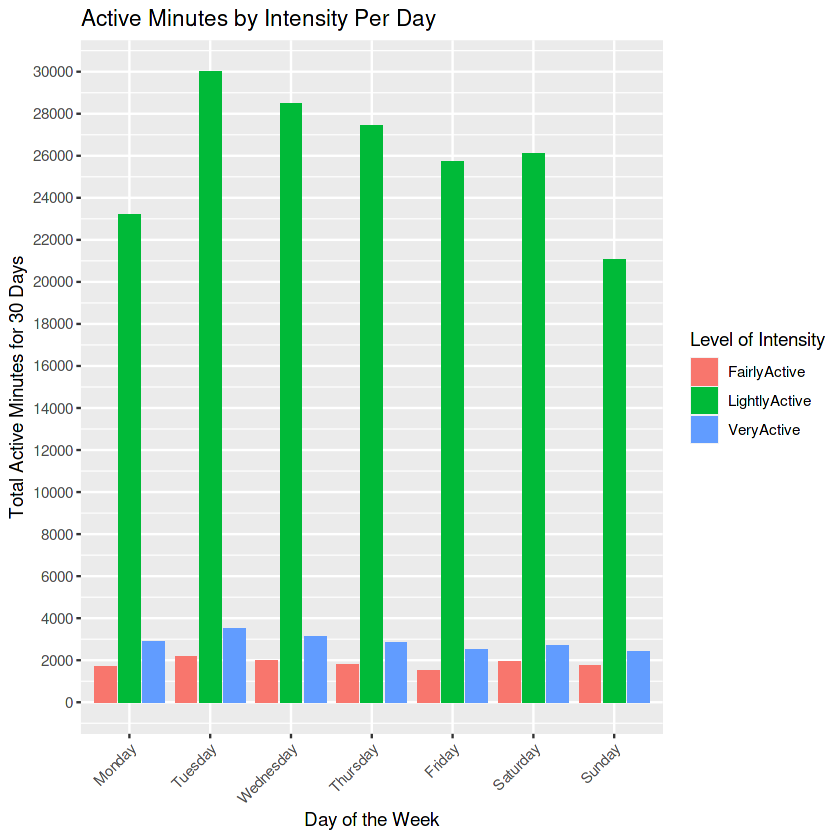

In [29]:
ggplot(active_minutes_long, aes(x = Date, y = total_minutes)) +
  geom_col(aes(fill = minutes_levels), position = position_dodge2(preserve = "single")) +
  labs(title = "Active Minutes by Intensity Per Day", 
       x = "Day of the Week",
       y = "Total Active Minutes for 30 Days",
       fill = "Level of Intensity") +
  theme(axis.text.x=element_text(angle=45,hjust=1)) +
  scale_y_continuous(breaks = seq(0, 30000, 2000))

We can clearly see that most of the participants have been only lightly active for the 30 days surveyed.  Tuesday having the most active minutes overall, that's interesting considering we observed earlier tuesday having the most poor quality sleep.  However we have to keep in mind that not all participants we recorded activity, also recorded sleep so that observation could be misleading.

Let's take a closer look at the Very Active and Fairly Active minutes, again I'll create another dataframe as to not change the original data, as well as creating an order for the days of the week.

In [30]:
active_mins <- full_activity_log %>% 
  select(Date, VeryActiveMinutes, FairlyActiveMinutes) %>% 
  group_by(Date) %>%
  summarize(VeryActive = sum(VeryActiveMinutes),
            FairlyActive = sum(FairlyActiveMinutes))

head(active_mins)

active_mins$Date <- factor(active_mins$Date, 
                              levels = c("Monday", "Tuesday", "Wednesday", 
                                         "Thursday", "Friday", "Saturday", 
                                         "Sunday"))

active_mins_long <- pivot_longer(active_mins,
                                    cols = ends_with("Active"), 
                                    names_to = "minutes_levels", 
                                    values_to = "total_minutes")

Date,VeryActive,FairlyActive
<chr>,<dbl>,<dbl>
Friday,2527,1526
Monday,2890,1696
Saturday,2723,1931
Sunday,2418,1758
Thursday,2865,1797
Tuesday,3489,2179


Now I can create a plot like before, but only focusing on these 2 activity levels

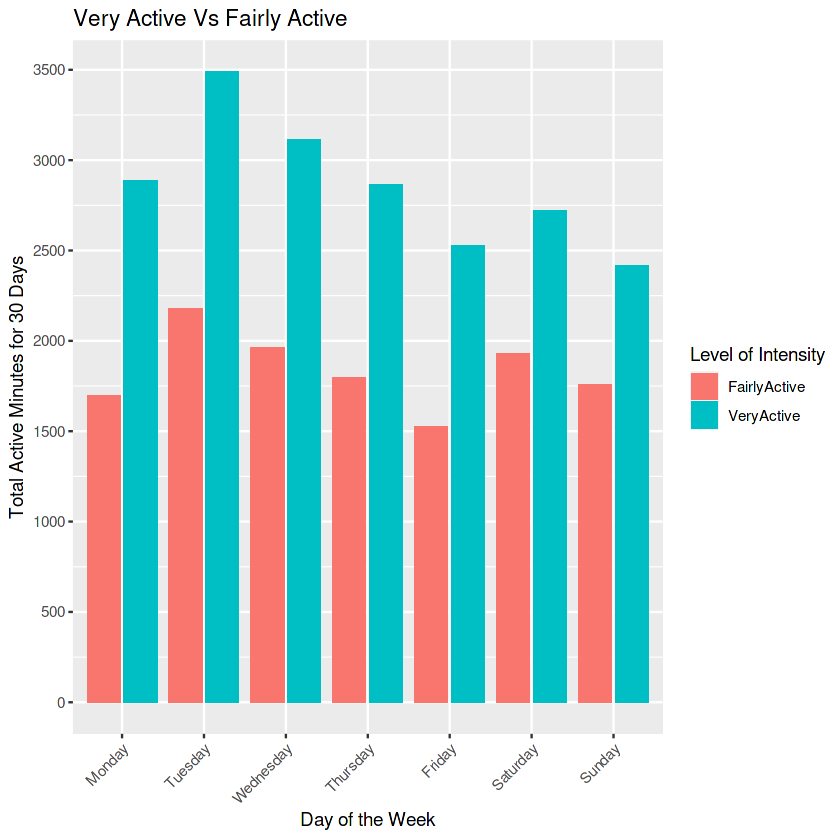

In [31]:
ggplot(active_mins_long, aes(x = Date, y = total_minutes)) +
  geom_col(aes(fill = minutes_levels), position = position_dodge2(preserve = "single")) +
  labs(title = "Very Active Vs Fairly Active", 
       x = "Day of the Week",
       y = "Total Active Minutes for 30 Days",
       fill = "Level of Intensity") +
  theme(axis.text.x=element_text(angle=45,hjust=1)) +
  scale_y_continuous(breaks = seq(0, 4000, 500))

As before we see that Tuesday still has the most activity, after monday we have an increase in activity and then it slowly drops again until Saturday.

Before moving on, I want to add in the Sendetary minutes, to see how the inactivity compares to the other levels of active minutes.

In [32]:
sedent_minutes <- full_activity_log %>% 
  select(Date, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes) %>% 
  group_by(Date) %>%
  summarize(VeryActive = sum(VeryActiveMinutes),
            FairlyActive = sum(FairlyActiveMinutes),
            LightlyActive = sum(LightlyActiveMinutes),
            SedentActive= sum(SedentaryMinutes))





In [33]:
sedent_minutes$Date <- factor(sedent_minutes$Date, 
                                    levels = c("Monday", "Tuesday", "Wednesday", 
                                               "Thursday", "Friday", "Saturday", 
                                               "Sunday"))

In [34]:
sedent_minutes_long <- pivot_longer(sedent_minutes,
                                    cols = ends_with("Active"), 
                                    names_to = "minutes_levels", 
                                    values_to = "total_minutes") 

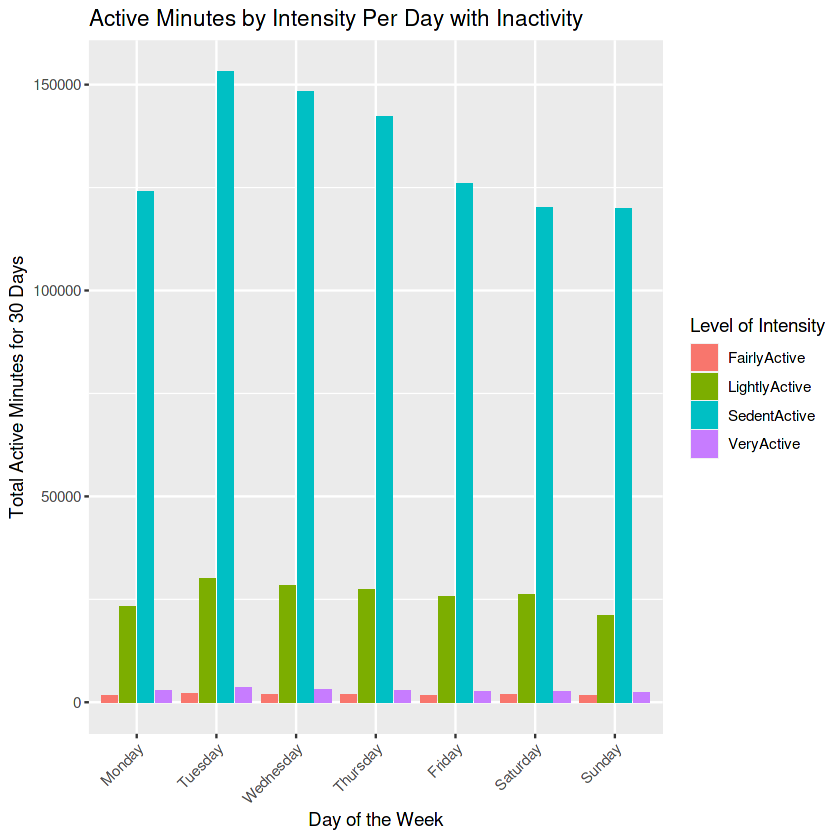

In [35]:
ggplot(sedent_minutes_long, aes(x = Date, y = total_minutes)) +
  geom_col(aes(fill = minutes_levels), position = position_dodge2(preserve = "single")) +
  labs(title = "Active Minutes by Intensity Per Day with Inactivity", 
       x = "Day of the Week",
       y = "Total Active Minutes for 30 Days",
       fill = "Level of Intensity") +
  theme(axis.text.x=element_text(angle=45,hjust=1))

There is a significant amount of inacitivty for the 30 days recorded from participants, compared to the other levels of activity for the month.

Let's see how the activity levels are compared to time asleep and sleep quality

In [36]:
sleep_activity_df <- full_activity_log %>% 
  select(Date, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, 
         SedentaryMinutes, TotalMinutesAsleep, SleepQuality)
  

head(sleep_activity_df)

Date,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalMinutesAsleep,SleepQuality
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Tuesday,25,13,328,728,327,Sleep Deprived
Wednesday,21,19,217,776,384,Adequate Sleep
Thursday,30,11,181,1218,NA,NA
Friday,29,34,209,726,412,Adequate Sleep
Saturday,36,10,221,773,340,Sleep Deprived
Sunday,38,20,164,539,700,Excessive Sleep


When creating the plots, we have to remember to filter the NA data, as not to skew our results.

The first plot we'll look at compares the sleep data to the very active minutes recorded

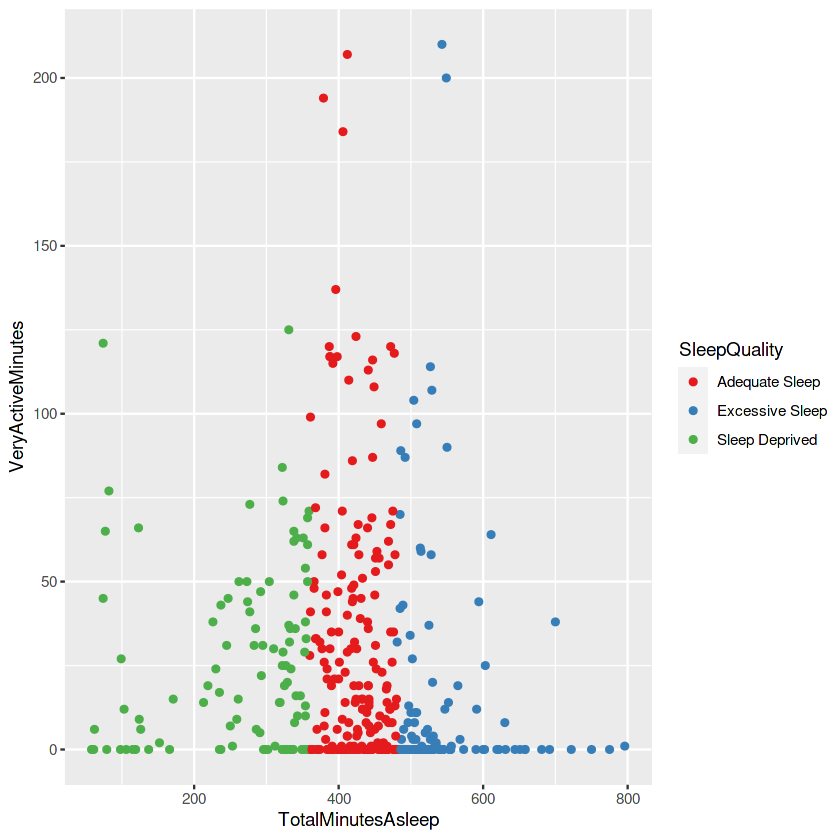

In [37]:
sleep_activity_df %>% 
  filter(!is.na(TotalMinutesAsleep)) %>% 
  filter(!is.na(SleepQuality)) %>% 
  ggplot(mapping = aes(x = TotalMinutesAsleep, y = VeryActiveMinutes)) +
  geom_point(aes(color = SleepQuality)) +
  scale_color_brewer(palette = "Set1")

Sleep vs Sedentary Minutes

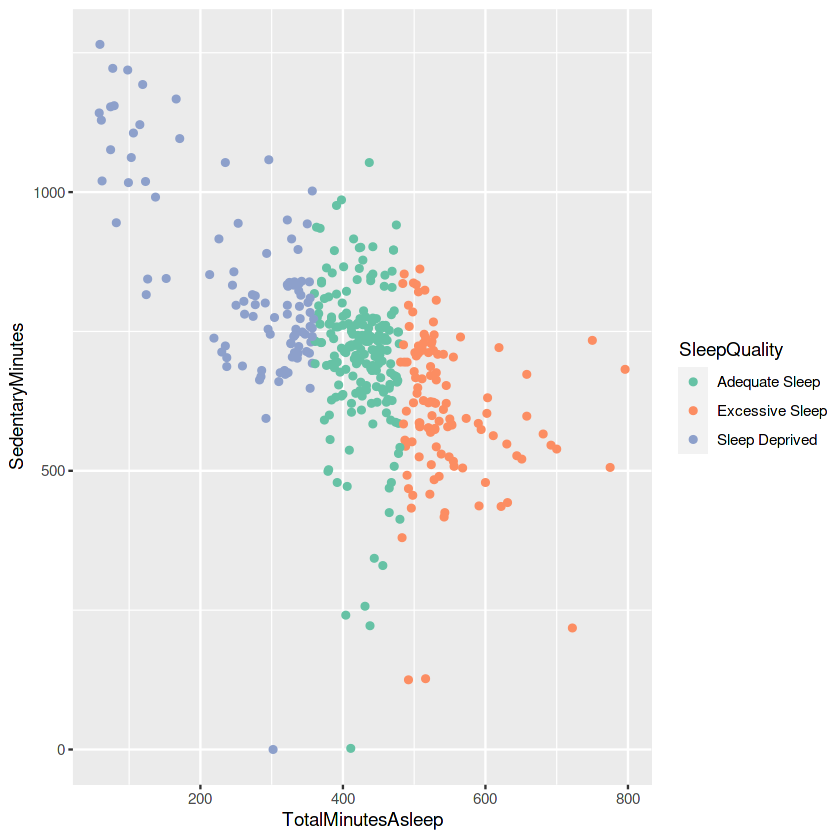

In [38]:
sleep_activity_df %>% 
  filter(!is.na(TotalMinutesAsleep)) %>% 
  filter(!is.na(SleepQuality)) %>% 
  ggplot(mapping = aes(x = TotalMinutesAsleep, y = SedentaryMinutes)) +
  geom_point(aes(color = SleepQuality)) +
  scale_color_brewer(palette = "Set2")

We can see that the participants with the most Sedentary Minutes, also are the most Sleep Deprived.

Sleep vs Lightly Active

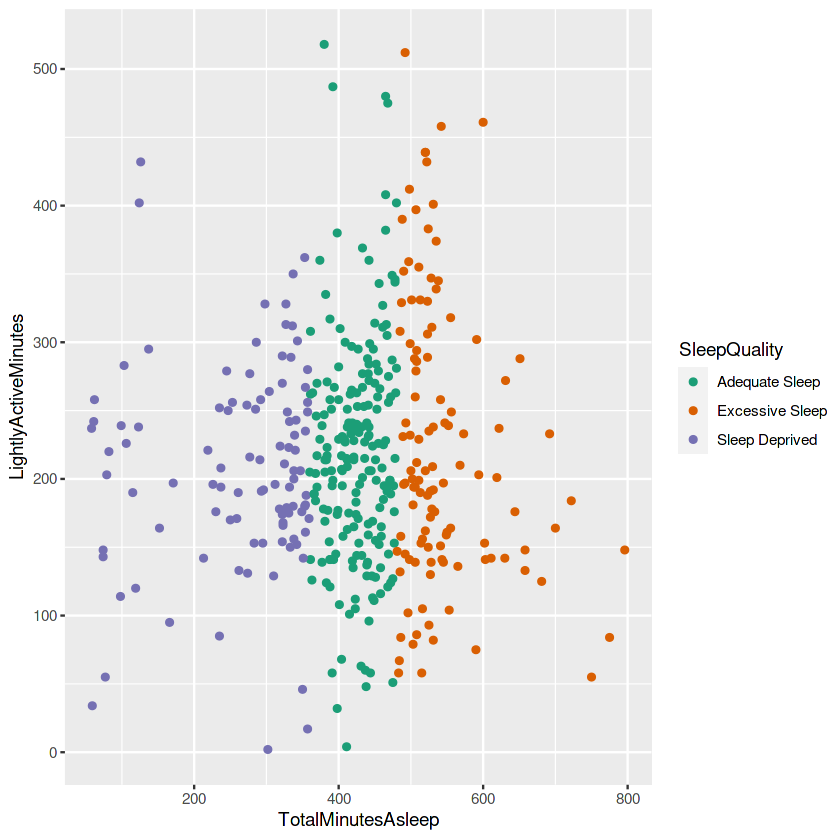

In [39]:
sleep_activity_df %>% 
  filter(!is.na(TotalMinutesAsleep)) %>% 
  filter(!is.na(SleepQuality)) %>% 
  ggplot(mapping = aes(x = TotalMinutesAsleep, y = LightlyActiveMinutes)) +
  geom_point(aes(color = SleepQuality)) +
  scale_color_brewer(palette = "Dark2")
  

Lightly Active had the highest total minutes of activity out of all the active levels, which is why we see more data points on this scatter plot.  

Sleep vs Fairly Active

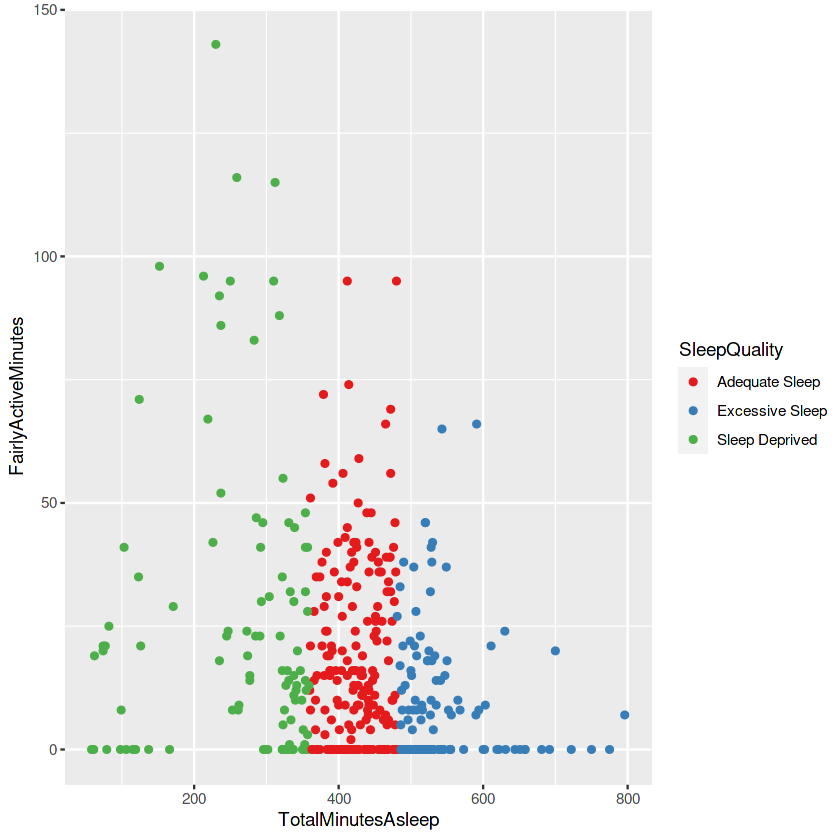

In [40]:
sleep_activity_df %>% 
  filter(!is.na(TotalMinutesAsleep)) %>% 
  filter(!is.na(SleepQuality)) %>% 
  ggplot(mapping = aes(x = TotalMinutesAsleep, y = FairlyActiveMinutes)) +
  geom_point(aes(color = SleepQuality)) +
  scale_color_brewer(palette = "Set1")

Those who are categorized as Sleep Deprived, seem to be more scattered on the chart for the fair activity level.

From all 4 plots, it seems that those with Adequate sleep are more concentrated around each other in regards to the levels of activity.  Except for the Very Active level, while you would think those with Adequate sleep would have a high concentration of Very Active minutes, it doesn't appear to be the case.  

The take away from these comparisons is that the majority of the participants are only Lightly Active, with also a high level of Sedentary minutes (especially those that are lacking sleep).

Finally let's take a look and see if Sleep Quality has any impact on weight for the participants.  Creating a new dataframe as not to make changes to the original data, and making sure to filter out the NA data from the weight columns

In [41]:
weight_sleep_df <- full_activity_log %>% 
  select(Date, WeightPounds, BMI, TotalMinutesAsleep, SleepQuality)

head(weight_sleep_df)

Date,WeightPounds,BMI,TotalMinutesAsleep,SleepQuality
<chr>,<dbl>,<dbl>,<dbl>,<chr>
Tuesday,NA,NA,327,Sleep Deprived
Wednesday,NA,NA,384,Adequate Sleep
Thursday,NA,NA,NA,NA
Friday,NA,NA,412,Adequate Sleep
Saturday,NA,NA,340,Sleep Deprived
Sunday,NA,NA,700,Excessive Sleep


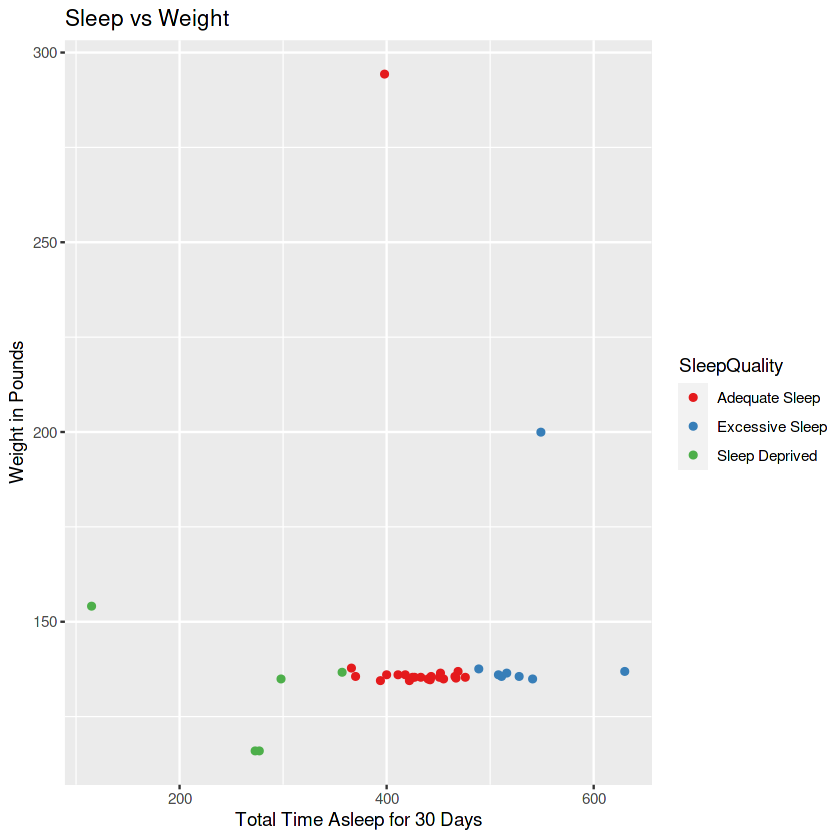

In [42]:
weight_sleep_df %>% 
  filter(!is.na(TotalMinutesAsleep)) %>% 
  filter(!is.na(SleepQuality)) %>% 
  filter(!is.na(WeightPounds)) %>% 
  filter(!is.na(BMI)) %>% 
  ggplot(mapping = aes(x = TotalMinutesAsleep, y = WeightPounds)) +
  geom_point(aes(color = SleepQuality)) +
  labs(title = "Sleep vs Weight", x = "Total Time Asleep for 30 Days", 
       y = "Weight in Pounds") +
  scale_color_brewer(palette = "Set1")

As we have so few participants who recorded sleep data, we do not have much to go on in regards to data points for a good comparison.  Other than a few outliers, there does not seem to be a lot of correlation between sleep and weight.  However this could also be misleading since we're using a very small data set.

# **Conclusion and Recommendations**

My prelimenary insights are that more users track their workouts, rather than their sleep and weight.  
  * Marketing should find ways to get users engaged in healthy sleep habits, and tracking their sleep data.  If clients use the Leaf bracelet or Time watch, are they taking these off for sleep?  How can they be engaged to then use the BellaBeat app.

Further analysis and data would be needed to delve further into the clients usage of BellaBeat products and how to best market to the different groups of user type.  

* I would recommend surveying a larger population of clients, in order to gain better insight into usage of the products.  With a very small data set such as this one, the data and results could be misleading and biased.  
* I would also recommend surverying and tracking data for longer than 30 days.  I come from working in the fitness industry, and people's acitivity levels will vary over an extended period of time.  
  * It could be  helpful to gain further insights into the usage of the products, and how to market to those who drop off after a time, or those who are more erratic with their usage over the extended period.  How do you properly draw them back in.
* I also think it would be helpful to know exactly which product(s) those surveyed have, and which product they use the most.
  *  This would be helpful for marketing to know which products are less used, how can we increase usage of the lesser used products? 
  
Without knowing which product the participants are using, it's hard to know which product to suggest for marketing and user growth.  

I will say that there was no data regarding the Spring Water Bottle product.  Are these participants not using the water bottle?  If they're not then why?
  *  This would be a good area to explore for user growth.  Can the BellaBeat app provide reminders for the Spring Water Bottle, and water intake in general?